# Project for Neural Networks lecture

## Deep Learning

## Project: Build a CIFAR10 Recognition Classifier
![LeNet Architecture](lenet.png)
Source: Yan LeCun

In this project, I will use deep neural networks and convolutional neural networks to classify CIFAR10 dataset from  [http://www.cs.toronto.edu/~kriz/cifar.html](http://www.cs.toronto.edu/~kriz/cifar.html).



## Step 0: Load The Data - code from: https://github.com/Hvass-Labs/TensorFlow-Tutorials/blob/master/cifar10.py

In [50]:
########################################################################
#
# Functions for downloading the CIFAR-10 data-set from the internet
# and loading it into memory.
#
# Implemented in Python 3.5
#
# Usage:
# 1) Set the variable data_path with the desired storage path.
# 2) Call maybe_download_and_extract() to download the data-set
#    if it is not already located in the given data_path.
# 3) Call load_class_names() to get an array of the class-names.
# 4) Call load_training_data() and load_test_data() to get
#    the images, class-numbers and one-hot encoded class-labels
#    for the training-set and test-set.
# 5) Use the returned data in your own program.
#
# Format:
# The images for the training- and test-sets are returned as 4-dim numpy
# arrays each with the shape: [image_number, height, width, channel]
# where the individual pixels are floats between 0.0 and 1.0.
#
########################################################################
#
# This file is part of the TensorFlow Tutorials available at:
#
# https://github.com/Hvass-Labs/TensorFlow-Tutorials
#
# Published under the MIT License. See the file LICENSE for details.
#
# Copyright 2016 by Magnus Erik Hvass Pedersen
#
########################################################################

import numpy as np
import pickle
import os
import download
from dataset import one_hot_encoded

########################################################################

# Directory where you want to download and save the data-set.
# Set this before you start calling any of the functions below.
data_path = "data/CIFAR-10/"

# URL for the data-set on the internet.
data_url = "https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz"

########################################################################
# Various constants for the size of the images.
# Use these constants in your own program.

# Width and height of each image.
img_size = 32

# Number of channels in each image, 3 channels: Red, Green, Blue.
num_channels = 3

# Length of an image when flattened to a 1-dim array.
img_size_flat = img_size * img_size * num_channels

# Number of classes.
num_classes = 10

########################################################################
# Various constants used to allocate arrays of the correct size.

# Number of files for the training-set.
_num_files_train = 5

# Number of images for each batch-file in the training-set.
_images_per_file = 10000

# Total number of images in the training-set.
# This is used to pre-allocate arrays for efficiency.
_num_images_train = _num_files_train * _images_per_file

########################################################################
# Private functions for downloading, unpacking and loading data-files.


def _get_file_path(filename=""):
    """
    Return the full path of a data-file for the data-set.
    If filename=="" then return the directory of the files.
    """

    return os.path.join(data_path, "cifar-10-batches-py/", filename)


def _unpickle(filename):
    """
    Unpickle the given file and return the data.
    Note that the appropriate dir-name is prepended the filename.
    """

    # Create full path for the file.
    file_path = _get_file_path(filename)

    print("Loading data: " + file_path)

    with open(file_path, mode='rb') as file:
        # In Python 3.X it is important to set the encoding,
        # otherwise an exception is raised here.
        data = pickle.load(file, encoding='bytes')

    return data


def _convert_images(raw):
    """
    Convert images from the CIFAR-10 format and
    return a 4-dim array with shape: [image_number, height, width, channel]
    where the pixels are floats between 0.0 and 1.0.
    """

    # Convert the raw images from the data-files to floating-points.
#     raw_float = np.array(raw, dtype=float) / 255.0
#     raw_float = np.array(raw, dtype=float)

    # Reshape the array to 4-dimensions.
#     images = raw_float.reshape([-1, num_channels, img_size, img_size])
    images = raw.reshape([-1, num_channels, img_size, img_size])

    # Reorder the indices of the array.
    images = images.transpose([0, 2, 3, 1])

    return images


def _load_data(filename):
    """
    Load a pickled data-file from the CIFAR-10 data-set
    and return the converted images (see above) and the class-number
    for each image.
    """

    # Load the pickled data-file.
    data = _unpickle(filename)

    # Get the raw images.
    raw_images = data[b'data']

    # Get the class-numbers for each image. Convert to numpy-array.
    cls = np.array(data[b'labels'])

    # Convert the images.
    images = _convert_images(raw_images)

    return images, cls


########################################################################
# Public functions that you may call to download the data-set from
# the internet and load the data into memory.


def maybe_download_and_extract():
    """
    Download and extract the CIFAR-10 data-set if it doesn't already exist
    in data_path (set this variable first to the desired path).
    """

    download.maybe_download_and_extract(url=data_url, download_dir=data_path)


def load_class_names():
    """
    Load the names for the classes in the CIFAR-10 data-set.
    Returns a list with the names. Example: names[3] is the name
    associated with class-number 3.
    """

    # Load the class-names from the pickled file.
    raw = _unpickle(filename="batches.meta")[b'label_names']

    # Convert from binary strings.
    names = [x.decode('utf-8') for x in raw]

    return names


def load_training_data():
    """
    Load all the training-data for the CIFAR-10 data-set.
    The data-set is split into 5 data-files which are merged here.
    Returns the images, class-numbers and one-hot encoded class-labels.
    """

    # Pre-allocate the arrays for the images and class-numbers for efficiency.
    images = np.zeros(shape=[_num_images_train, img_size, img_size, num_channels], dtype=float)
    cls = np.zeros(shape=[_num_images_train], dtype=int)

    # Begin-index for the current batch.
    begin = 0

    # For each data-file.
    for i in range(_num_files_train):
        # Load the images and class-numbers from the data-file.
        images_batch, cls_batch = _load_data(filename="data_batch_" + str(i + 1))

        # Number of images in this batch.
        num_images = len(images_batch)

        # End-index for the current batch.
        end = begin + num_images

        # Store the images into the array.
        images[begin:end, :] = images_batch

        # Store the class-numbers into the array.
        cls[begin:end] = cls_batch

        # The begin-index for the next batch is the current end-index.
        begin = end

    return images, cls, one_hot_encoded(class_numbers=cls, num_classes=num_classes)


def load_test_data():
    """
    Load all the test-data for the CIFAR-10 data-set.
    Returns the images, class-numbers and one-hot encoded class-labels.
    """

    images, cls = _load_data(filename="test_batch")

    return images, cls, one_hot_encoded(class_numbers=cls, num_classes=num_classes)

########################################################################

In [66]:
class_names = load_class_names()

Loading data: data/CIFAR-10/cifar-10-batches-py/batches.meta


In [51]:
maybe_download_and_extract()

Data has apparently already been downloaded and unpacked.


In [52]:
X, y, one_hot_y_train = load_training_data()

Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_1
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_2
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_3
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_4
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_5


In [53]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

In [55]:
X_test, y_test, one_hot_y_test = load_test_data()

Loading data: data/CIFAR-10/cifar-10-batches-py/test_batch


---

## Step 1: Dataset Summary & Exploration


### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [56]:
# Number of training examples
n_train = len(X_train)

# Number of validation examples
n_validation = len(X_valid)

# Number of testing examples.
n_valid = len(X_valid)

# Number of testing examples.
n_test = len(X_test)

# What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# How many unique classes/labels there are in the dataset.
n_classes = len(set(y_train))

print("Number of training examples =", n_train)
print("Number of validation examples =", n_valid)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 40000
Number of validation examples = 10000
Number of testing examples = 10000
Image data shape = (32, 32, 3)
Number of classes = 10


### Include an exploratory visualization of the dataset

Visualize the CIFAR10 Dataset using the pickled file(s): images and distribution of classes in each dataset.

In [69]:
# Randomly choose indices to represent which datapoints we choose from the training set
import math
import numpy as np
import random
import matplotlib.pyplot as plt

def plot_images(num, x, y, path):  
    num_images = num
    indices = np.random.choice(list(range(len(x))), size=num_images, replace=False)

    # Obtain the images and labels
    images = x[indices]
    labels = y[indices]

    for i, image in enumerate(images):
        plt.rcParams["figure.figsize"] = [15, 5]
        plt.subplot(2, math.ceil(num_images/2.), i+1)
        plt.imshow(image)
        plt.title('%s' % class_names[labels[i]])

    plt.tight_layout()
    plt.savefig(path)
    plt.show()

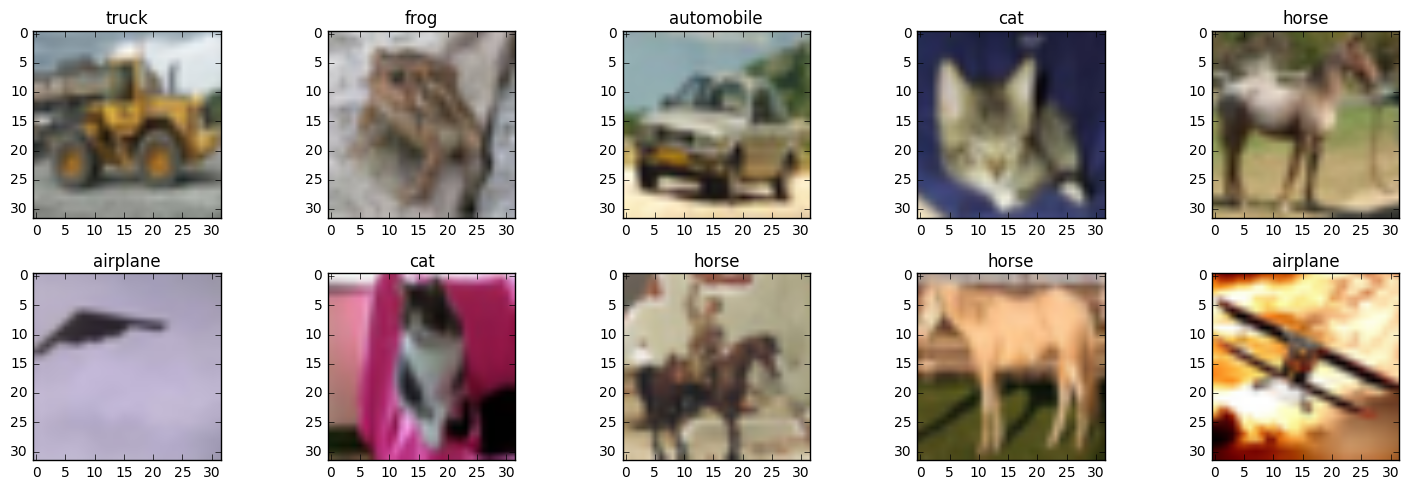

In [73]:
plot_images(10, X_train/255, y_train, 'writeup_images/examples_X_train.jpg')

In [82]:
# Count frequency of each label
def namestr(obj, namespace):
    return [name for name in namespace if namespace[name] is obj]

def plot_hist(y, path):    
    labels, counts = np.unique(y, return_counts=True)

    # Plot the histogram
    plt.rcParams["figure.figsize"] = [15, 5]
    axes = plt.gca()
    axes.set_xlim([-1,10])

    plt.bar(labels, counts, tick_label=labels, width=0.8, align='center')
    plt.title('Distribution of classes on {} data'.format(namestr(y, globals())))
    plt.savefig(path)
    plt.show()
    

### Plot histogram of the train dataset

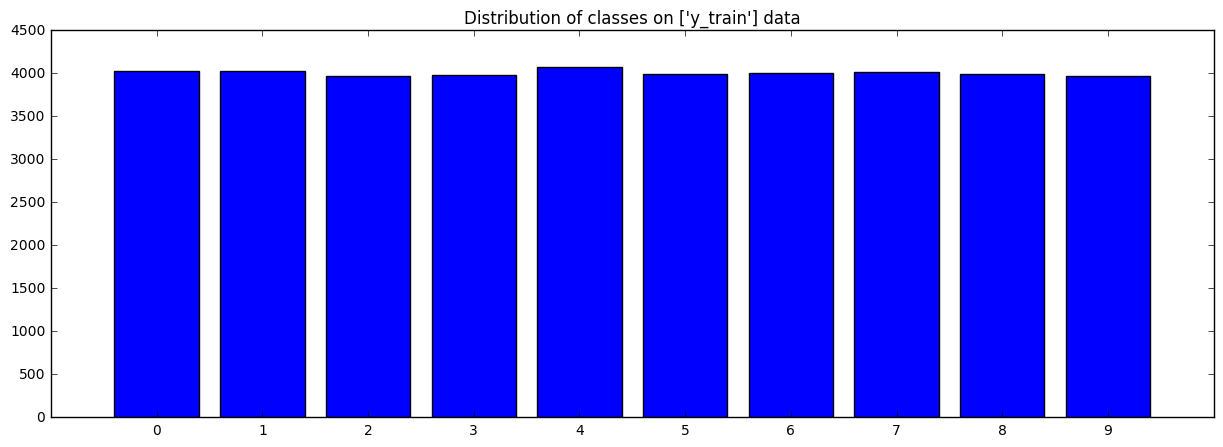

In [83]:
plot_hist(y_train, 'writeup_images/hist_y_train.jpg')

### Plot histogram of the validation dataset

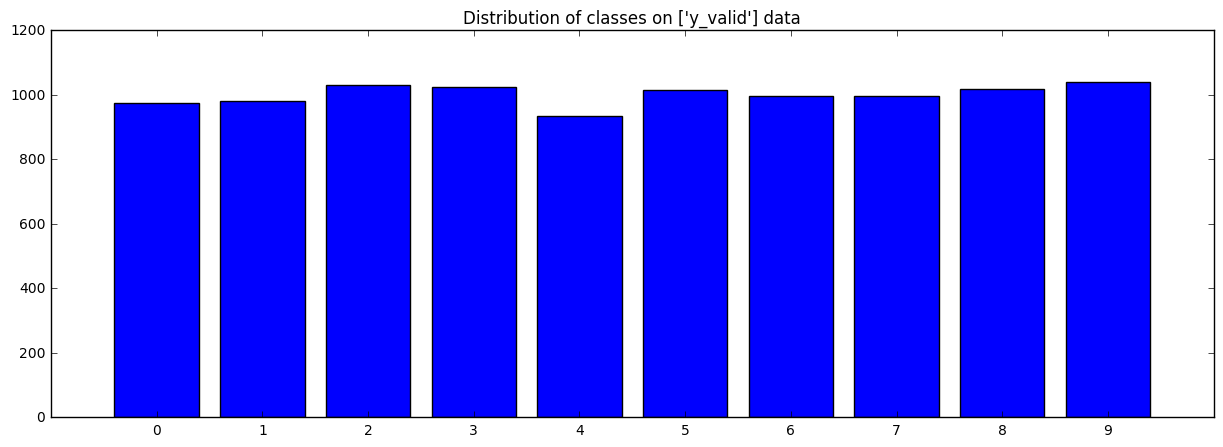

In [84]:
# Count frequency of each label
plot_hist(y_valid,'writeup_images/hist_y_valid.jpg')

### Plot histogram of the test dataset

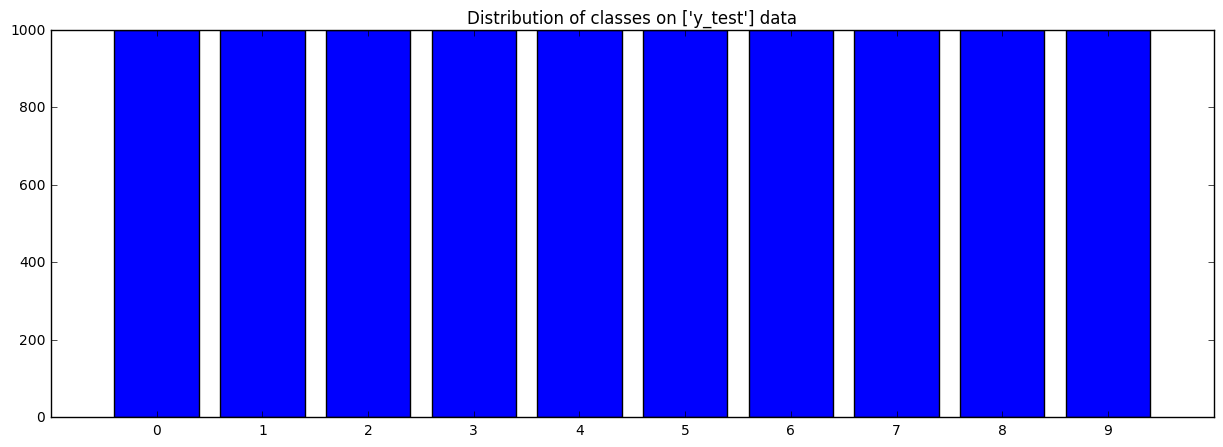

In [85]:
# Count frequency of each label
plot_hist(y_test,'writeup_images/hist_y_test.jpg')

----

## Step 2: Design and Test a Model Architecture

In this part I will design and implement a deep learning model that learns to recognize categories in dataset. 

The implementation shown in the [LeNet-5](http://yann.lecun.com/exdb/lenet/) is a solid starting point. 
There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). 

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

In [140]:
def center_normalize(data):
    """Center normalize images"""
    data = data.astype('float32')
    data -= 128.
    data /= 128.
    return data

def convert_to_grey(data):
    images_grey = np.average(data, axis=3)
    images_grey = np.expand_dims(images_grey, axis=3)
    return images_grey

def undo_normalize(data):
    return (data*128 + 128)/255

In [87]:
X_train = center_normalize(X_train)
X_valid = center_normalize(X_valid)
X_test  = center_normalize(X_test)

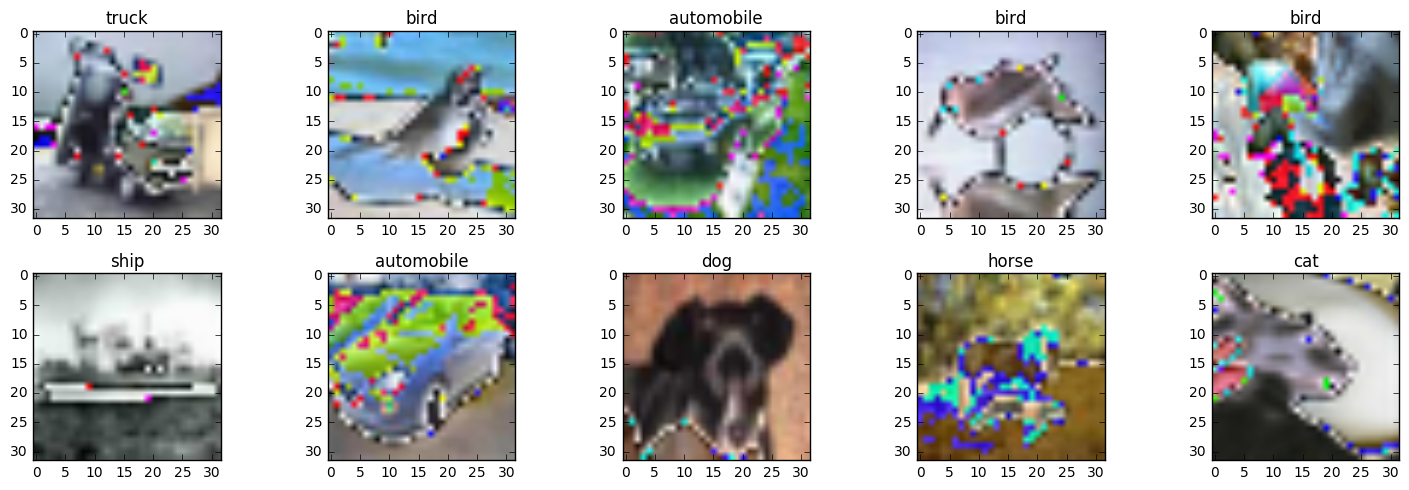

In [88]:
plot_images(10, X_train, y_train, 'writeup_images/examples_X_train_normalized.jpg')

### Model Architecture

### Input
The LeNet architecture accepts a 32x32xC image as input, where C is the number of color channels. Since traffic signs images are RGB, and converting them to greyscale (C=1) didn't improve accuracy, I set C equals 3.

### Architecture:
**Layer 1: Convolutional.** The output shape should be 28x28x6.

**Activation.** Your choice of activation function. I used ReLU activation (https://en.wikipedia.org/wiki/Rectifier_(neural_networks).

**Pooling.** The output shape should be 14x14x6.

---
**Layer 2: Convolutional.** The output shape should be 10x10x16.

**Activation.** Your choice of activation function. Again, I used ReLU activation.

**Pooling.** The output shape should be 5x5x16.

**Flatten.** Flatten the output shape of the final pooling layer such that it's 1D instead of 3D. The easiest way to do is by using `tf.contrib.layers.flatten`, which is already imported for you.

---
**Layer 3: Fully Connected.** This should have 120 outputs.

**Activation.** ReLU activation.

**Regularization.** I used dropout regularization with probabilty of dropout equals 50%

---
**Layer 4: Fully Connected.** This should have 84 outputs.

**Activation.** ReLU activation.

**Regularization.** I used dropout regularization with probabilty of dropout equals 50%

---
**Layer 5: Fully Connected (Logits).** This should have 43 outputs.

### Output
Return the result of the 2nd fully connected layer.

In [89]:
import tensorflow as tf
from sklearn.utils import shuffle

EPOCHS = 40
BATCH_SIZE = 128

In [90]:
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
keep_prob = tf.placeholder(tf.float32)

one_hot_y = tf.one_hot(y, n_classes)

In [91]:
from tensorflow.contrib.layers import flatten

# Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
mu = 0
sigma = 0.1

conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 6), mean = mu, stddev = sigma))
conv1_b = tf.Variable(tf.zeros(6))

conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
conv2_b = tf.Variable(tf.zeros(16))

fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
fc1_b = tf.Variable(tf.zeros(120))

fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
fc2_b  = tf.Variable(tf.zeros(84))
    
fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, n_classes), mean = mu, stddev = sigma))
fc3_b  = tf.Variable(tf.zeros(n_classes))

In [92]:
def LeNet(x, dropout):    
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x6.
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)
    fc1    = tf.nn.dropout(fc1, dropout)
    
    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)
    fc2    = tf.nn.dropout(fc2, dropout)

    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 43.
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

#### I used regularization for the second time: L2 regulatization prevents model from overfitting. Values of Learning rate and L2 hyperparam was chosen experimentally.

In [93]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set is calculated and reported as well.

rate = 0.0007
l2_param = 0.007

logits = LeNet(x, keep_prob)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy + l2_param*(tf.nn.l2_loss(conv1_W) + \
                               tf.nn.l2_loss(conv1_b) + \
                               tf.nn.l2_loss(conv2_W) + \
                               tf.nn.l2_loss(conv2_b) + \
                               tf.nn.l2_loss(fc1_W) + \
                               tf.nn.l2_loss(fc1_b) + \
                               tf.nn.l2_loss(fc2_W) +
                               tf.nn.l2_loss(fc2_b) +
                               tf.nn.l2_loss(fc3_W) +
                               tf.nn.l2_loss(fc3_b)))
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

In [94]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_loss = 0
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        loss, accuracy = sess.run([loss_operation, accuracy_operation], feed_dict={x: batch_x, y: batch_y, keep_prob: 1.})
        total_accuracy += (accuracy * len(batch_x))
        total_loss += (loss * len(batch_x))
    return total_loss / num_examples, total_accuracy / num_examples

### Main part of the implementation. Here I am training the model on batches over all epochs (which takes a lot of time). Then the model is saved.

In [95]:
# Arrays below store data to plot loss and accuracy over epochs.
validation_loss_arr = []
training_loss_arr = []
validation_accuracy_arr = []
training_accuracy_arr = []

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        X_valid, y_valid = shuffle(X_valid, y_valid)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.5})
            
        validation_loss, validation_accuracy = evaluate(X_valid, y_valid)
        training_loss, training_accuracy = evaluate(X_train, y_train)
        
        validation_loss_arr.append(validation_loss)
        training_loss_arr.append(training_loss)
        validation_accuracy_arr.append(validation_accuracy)
        training_accuracy_arr.append(training_accuracy)
        
        print("EPOCH {} ...".format(i+1))
        print("Train Accuracy = {:.3f}".format(training_accuracy))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print("Train Loss = {:.3f}".format(training_loss))
        print("Validation Loss = {:.3f}".format(validation_loss))
        print()
        
    saver.save(sess, './traffic_signs.chkp')
    print("Model saved")
    print("Done")

Training...

EPOCH 1 ...
Train Accuracy = 0.373
Validation Accuracy = 0.375
Train Loss = 2.055
Validation Loss = 2.052

EPOCH 2 ...
Train Accuracy = 0.422
Validation Accuracy = 0.426
Train Loss = 1.814
Validation Loss = 1.812

EPOCH 3 ...
Train Accuracy = 0.448
Validation Accuracy = 0.450
Train Loss = 1.711
Validation Loss = 1.714

EPOCH 4 ...
Train Accuracy = 0.471
Validation Accuracy = 0.469
Train Loss = 1.644
Validation Loss = 1.647

EPOCH 5 ...
Train Accuracy = 0.478
Validation Accuracy = 0.477
Train Loss = 1.620
Validation Loss = 1.625

EPOCH 6 ...
Train Accuracy = 0.495
Validation Accuracy = 0.493
Train Loss = 1.575
Validation Loss = 1.584

EPOCH 7 ...
Train Accuracy = 0.500
Validation Accuracy = 0.499
Train Loss = 1.559
Validation Loss = 1.572

EPOCH 8 ...
Train Accuracy = 0.504
Validation Accuracy = 0.492
Train Loss = 1.554
Validation Loss = 1.571

EPOCH 9 ...
Train Accuracy = 0.513
Validation Accuracy = 0.500
Train Loss = 1.541
Validation Loss = 1.560

EPOCH 10 ...
Train Accur

#### Measuer the accuracy on test data.

In [96]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_loss, test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))
    print("Test Loss = {:.3f}".format(test_loss))

Test Accuracy = 0.590
Test Loss = 1.422


#### Plot the accuracy

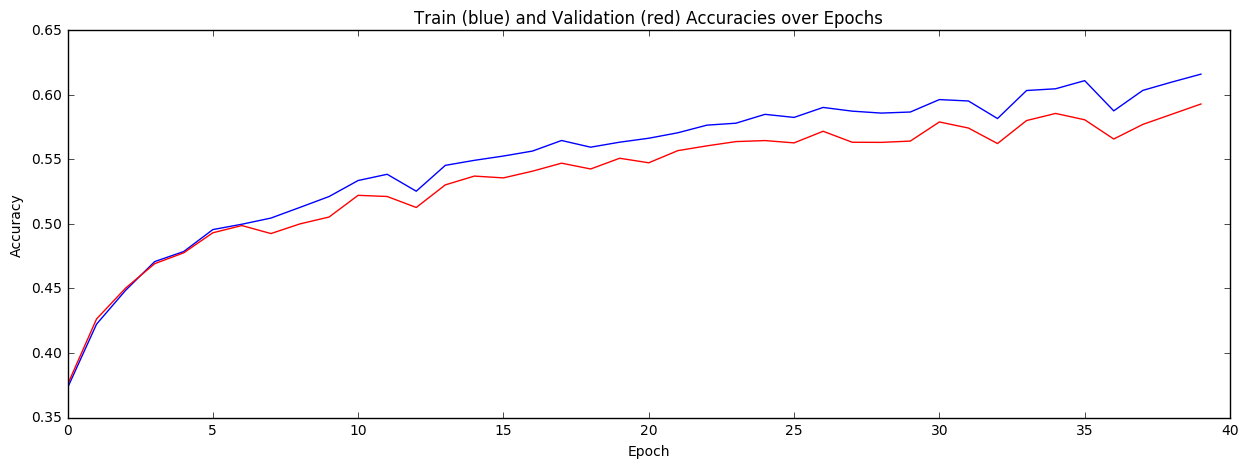

In [97]:
plt.plot(training_accuracy_arr, 'b')  # training accuracy
plt.plot(validation_accuracy_arr, 'r')  # validation accuracy
plt.rcParams["figure.figsize"] = [10, 5]
plt.title('Train (blue) and Validation (red) Accuracies over Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

#### Plot the loss

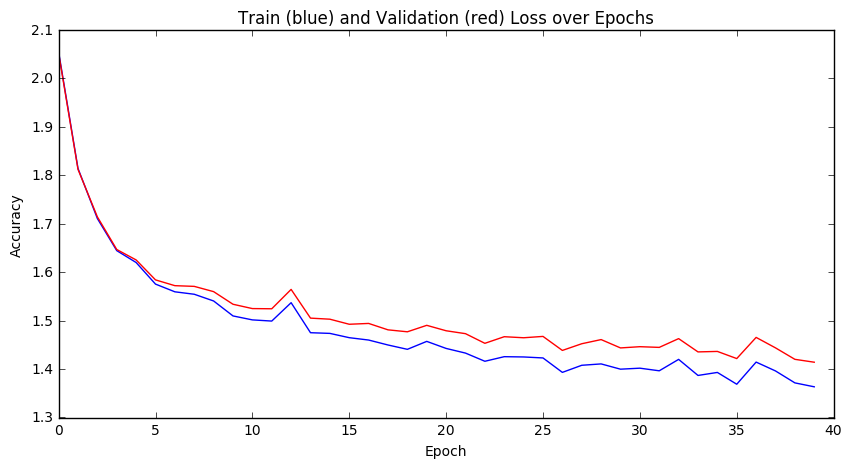

In [98]:
plt.plot(training_loss_arr, 'b')  # training loss
plt.plot(validation_loss_arr, 'r')  # validation loss
plt.rcParams["figure.figsize"] = [10, 5]
plt.title('Train (blue) and Validation (red) Loss over Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

---

## Step 3: Run a Model on few Test Images


### Load and Output the Images

In [150]:
indices = np.random.choice(list(range(len(X_test))), size=10, replace=False)

# Obtain the images and labels
test = X_test[indices]
labels = y_test[indices]

### Predict the Sign Type for Each Image

In [151]:
predictions = tf.argmax(logits, 1)
sm = tf.nn.softmax(logits)
top_k_val, top_k_idx = tf.nn.top_k(sm, k=5)

def predict_cifar10(X_data):
    sess = tf.get_default_session()
    logit_results, prediction_results, top_k_vals, top_k_idxs, softmax_results = \
        sess.run([logits, predictions, top_k_val, top_k_idx, sm], feed_dict={x: X_data, keep_prob: 1.})
        
    return logit_results, prediction_results, top_k_vals, top_k_idxs, softmax_results

In [152]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    logit_results, prediction_results, top_k_vals, top_k_idxs, softmax_results = predict_cifar10(test)
    final_preds = [class_names[pred] for pred in prediction_results]

#### Print predictions on sample images

In [153]:
print('Predictions on traffic sign images:\n')
for i in range(traffic_signs.shape[0]):
    print('{:30} :(Prediction) {}'.format(class_names[labels[i]], final_preds[i]))

Predictions on traffic sign images:

automobile                     :(Prediction) automobile
automobile                     :(Prediction) truck
deer                           :(Prediction) frog
deer                           :(Prediction) deer
dog                            :(Prediction) dog
automobile                     :(Prediction) truck
horse                          :(Prediction) cat
dog                            :(Prediction) frog
truck                          :(Prediction) truck
cat                            :(Prediction) cat


### Output Top 5 Softmax Probabilities For Test images

In [167]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.
def pred_certainty_str(top_k_val, top_k_idx):
    # Convert top k indices into strings
    top_k_pred = [class_names[idx] for idx in top_k_idx]    
    pcs = ''
    for i in range(5):
        pcs += '{}: {:.2f}%\n'.format(top_k_pred[i].replace('\n', ''), top_k_val[i] * 100)        
    return pcs  

def plot_images2(path):    
    for i, image in enumerate(test):
        plt.rcParams["figure.figsize"] = [15, 9]
        plt.subplot(2, 5, i+1)
        plt.imshow(undo_normalize(image))
        plt.title('%s' % class_names[labels[i]])
        plt.xlabel(pred_certainty_str(top_k_vals[i], top_k_idxs[i]))
    plt.tight_layout()
    plt.savefig(path)
    plt.show()

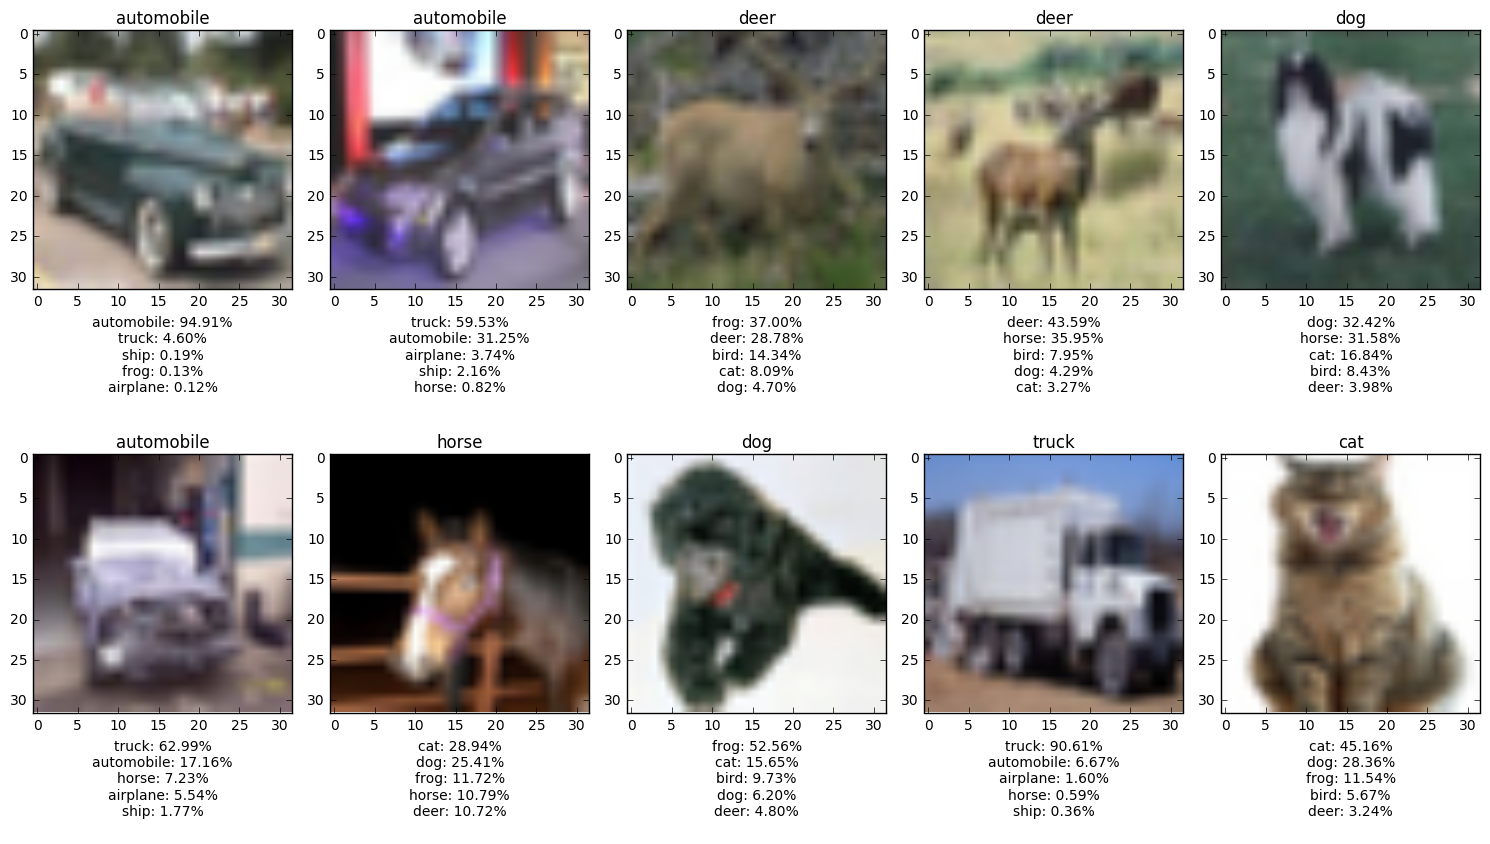

In [168]:
plot_images2('writeup_images/examples_5_softmax.jpg')